# DecisionTree

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.preprocessing import scale
import warnings
warnings.filterwarnings('ignore')

In [112]:
# import some data to play with
fraud = pd.read_csv('Fraud_check.csv')

In [113]:
fraud1=fraud.loc[0:]

In [114]:
fraud1

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [115]:
fraud1.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [116]:
fraud1["fraud_yn"] = pd.cut(fraud1["Taxable.Income"], bins = [10000,30000,99719], labels = ["Risky", "Good"])

In [117]:
fraud1.drop(["Taxable.Income"],axis=1,inplace=True)

In [118]:
fraud1['fraud_yn'].value_counts()

Good     476
Risky    124
Name: fraud_yn, dtype: int64

In [119]:
label_encoder = preprocessing.LabelEncoder()
fraud1['fraud_yn']= label_encoder.fit_transform(fraud1['fraud_yn'])
fraud1['Undergrad']= label_encoder.fit_transform(fraud1['Undergrad'])
fraud1['Marital.Status']= label_encoder.fit_transform(fraud1['Marital.Status'])
fraud1['Urban']= label_encoder.fit_transform(fraud1['Urban'])

In [120]:
fraud1

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,fraud_yn
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0
...,...,...,...,...,...,...
595,1,0,39492,7,1,0
596,1,0,55369,2,1,0
597,0,0,154058,0,1,0
598,1,1,180083,17,0,0


In [121]:
# Normalization function
#def norm_func(i):
#    x = (i-i.min())/(i.max()-i.min())
#    return (x)

# Normalized data frame (considering the numerical part of data)
#fraud2 = norm_func(fraud1.iloc[:,1:])

In [122]:
# Declaring features & target
x = fraud1.drop(['fraud_yn'], axis=1)
y = fraud1['fraud_yn']

In [123]:
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [124]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: fraud_yn, Length: 600, dtype: int64

In [125]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=42)

## Decision Tree model


### Building Decision Tree Classifier using Entropy Criteria

In [126]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

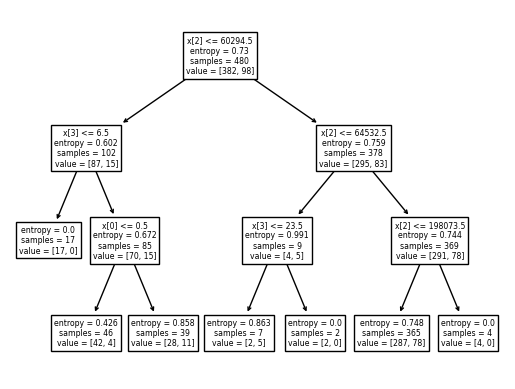

In [127]:
#PLot the decision tree
tree.plot_tree(model);


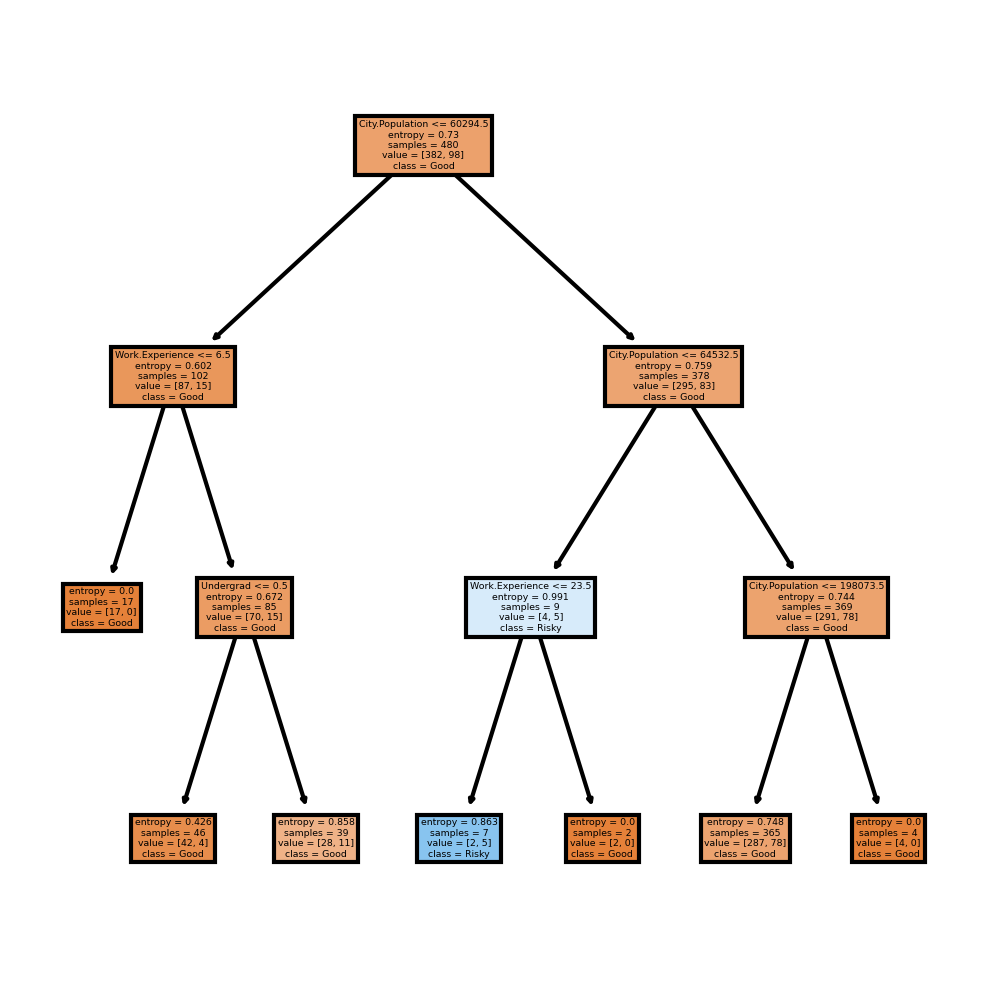

In [128]:
fn=['Undergrad',  'Marital.Status','City.Population', 'Work.Experience', 'Urban']
cn=['Good', 'Risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn,
               class_names=cn,
               filled = True);

In [129]:
text = tree.export_text(model,max_depth=3)
print(text)

|--- feature_2 <= 60294.50
|   |--- feature_3 <= 6.50
|   |   |--- class: 0
|   |--- feature_3 >  6.50
|   |   |--- feature_0 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_0 >  0.50
|   |   |   |--- class: 0
|--- feature_2 >  60294.50
|   |--- feature_2 <= 64532.50
|   |   |--- feature_3 <= 23.50
|   |   |   |--- class: 1
|   |   |--- feature_3 >  23.50
|   |   |   |--- class: 0
|   |--- feature_2 >  64532.50
|   |   |--- feature_2 <= 198073.50
|   |   |   |--- class: 0
|   |   |--- feature_2 >  198073.50
|   |   |   |--- class: 0



In [130]:
model.feature_importances_

array([0.22387639, 0.        , 0.38089844, 0.39522517, 0.        ])